In [1]:
import osmnx
import geopandas as gpd
import h3
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [36]:
# load data
sa = gpd.read_parquet('./data/sa.parquet')
streets = gpd.read_parquet('./data/streets.parquet')

In [37]:
# set local crs
local_crs = 2154

CPU times: total: 250 ms
Wall time: 249 ms


C:\Users\b9066009\AppData\Local\Temp\ipykernel_15916\1822551654.py:19: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  sa_polys_gdf.to_parquet('./data/hexagons.parquet')


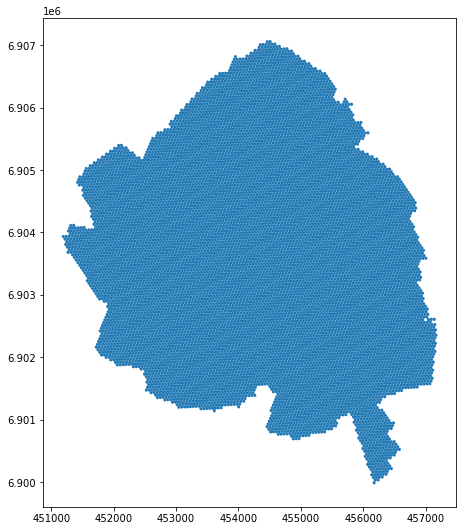

In [39]:
# generate tessellation
test = h3.polyfill(sa.to_crs(4326).geometry[0].__geo_interface__, 11, geo_json_conformant = True)

polygonise = lambda hex_id: Polygon(
                                h3.h3_to_geo_boundary(
                                    hex_id, geo_json=True)
                                    )

%time sa_polys = gpd.GeoSeries(list(map(polygonise, test)), \
                                      index=test, \
                                      crs="EPSG:4326" \
                                     )
# plot grid
ax = sa_polys.to_crs(epsg = local_crs).plot(figsize=(9,9))

# save hex layer as gdf
sa_polys_gdf = gpd.GeoDataFrame({"geometry": sa_polys,
                                 "hex_id": sa_polys.index},
                                crs=sa_polys.crs
                               )

sa_polys_gdf.to_parquet('./data/hexagons.parquet')

In [41]:
# centroids
centroids = sa_polys_gdf.to_crs(local_crs).centroid
centroids = gpd.GeoDataFrame(geometry=gpd.GeoSeries(centroids))
centroids.to_parquet('./data/centroids.parquet')

C:\Users\b9066009\AppData\Local\Temp\ipykernel_15916\63072174.py:4: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  centroids.to_parquet('./data/centroids.parquet')


<AxesSubplot:>

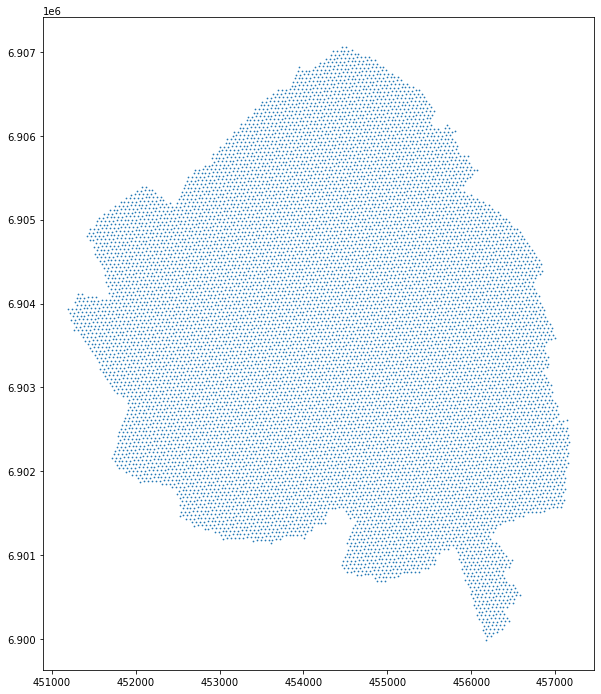

In [43]:
centroids.plot(figsize = (12,12), markersize = 0.5)